$\textbf{Sur les métriques en deep learning}$

En se place en classification binaire: $\mathcal{Y}=\{0,1\}$

In [1]:
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt

# Métriques probabilistes

Ce sont les fonctions de perte que l'on cherche à minimiser lorsque l'on cherche à optimiser les performances d'un modèle de classification binaire. Ces métriques sont fréquemment utilisées dans le cadre des réseaux de neurones.

## Enthropie croisée binaire (Binary Cross-Entropy / Log Loss)

On note: $\forall{i \in {1,...,n}}$:
* $p_i=P(Y_i=1)$
* $\hat{p}_i=P(\hat{Y}_i=1)$

La log loss est définie par:

\begin{equation}

-\frac{1}{n}\sum_{i=1}^n(y_i\log(\hat{p_i})+(1-y_i) \log(1-\hat{p_i}))

\end{equation}

Minimiser la cross-entropy revient à maximiser la vraisemblance du modèle en régression logistique (cf. TP1).

$\underline{Remarque}$: la cross-entropy peut aussi être définie en classification multi-classes.

La binary cross-entropy mesure la différence entre deux distributions de probabilités.

C'est la référence lorsque l'on construit un réseau de neurones. Néanmoins, elle n'est pas adaptée aux jeux de données déséquilibrés. D'où l'usage des métriques de classification.

In [9]:
import tensorflow as tf

m = tf.keras.metrics.BinaryCrossentropy()
m.update_state([[0, 1], [0, 0]], [[0.6, 0.4], [0.4, 0.6]])
m.result().numpy()

0.81492424

## Plein d'autres métriques...

Que ce soit pour la classification, la segmentation d'images ou la détection d'objets.
* Classification: on identifie une classe au sein d'une image
* Détection: se superpose à la classification en ajoutant la localisation de l'objet (représenté par des rectangles appelés bounding box)
* Segmentation: on classe chaque pixel d'une image en un label particulier

Voir: https://deeplylearning.fr/category/cours-theoriques-deep-learning/

Pour les métriques:
https://deeplylearning.fr/category/cours-theoriques-deep-learning/

https://keras.io/api/metrics/probabilistic_metrics/

# Métriques de classification

## Matrice de confusion

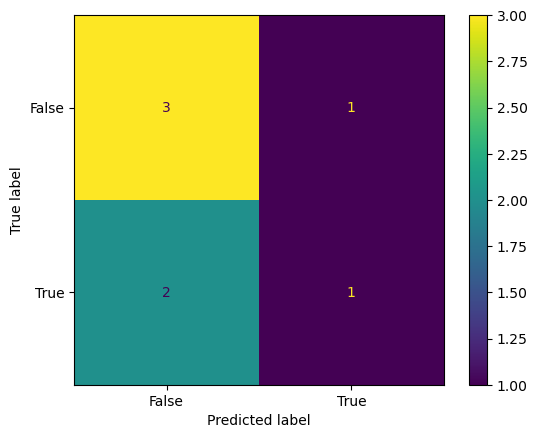

In [3]:
import sklearn.metrics

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative"]
y_pred = ["positive", "negative", "positive", "positive", "negative", "positive", "positive"]

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
r = np.flip(r)

cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = r, display_labels = [False, True])
cm_display.plot()
plt.show()

Même si la matrice de confusion est utile pour évaluer les performances d'un modèle, on préfère des mesures uniques. Ces dernières permettent de mesurer les performances globales du modèles et de considérer un problème de machine learning comme un problème de minimisation. Voici les principales métriques dérivées.

## Accuracy

\begin{equation}
    Accuracy=\frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

C'est le ratio entre le nombre total de prédictions correctes et le nombre total de prédictions.

L'accuracy mesure la performance du modèle sur toutes les classes. La métrique est utile lorsque les classes sont équilibrées. A l'inverse, elle n'est pas robuste lorsque les classes sont déséquilibrées.

In [4]:
sklearn.metrics.accuracy_score(y_true, y_pred)

0.5714285714285714

## Precision

\begin{equation}
    Precision=\frac{TP}{TP+FP}
\end{equation}

C'est la part de vrais positifs parmi l'ensemble des individus prédits comme positifs. Dis autrement, c'est la pourcentage d'individus prédits comme positifs, correctement classés comme positifs.

La precision mesure la fiabilité du modèle pour classer uniquement les individus positifs comme positifs.

La precision est élevée si:
* Beaucoup d'individus positifs sont prédits comme tel (maximise TP)
* Peu d'individus négatifs sont classés positifs (minimise FP)

Si la précision est élevée, on peut faire confiance lorsque le modèle prédit un individu comme positif.

In [5]:
precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label="positive")
precision

0.6

## Recall

\begin{equation}
    Recall=\frac{TP}{TP+FN}
\end{equation}

C'est la part de vrais positifs parmi l'ensemble des individus positifs. Dis autrement, c'est la pourcentage d'individus positifs correctement classés comme positifs. Avec le Recall, on s'intéresse uniquement à la manière dont les individus positifs sont classés.

Le Recall est élevé si:
* Beaucoup d'individus positifs sont prédits comme tel (maximise TP)
* Peu d'individus positifs sont prédits comme tel (minimise FN)

Ainsi, le taux de faux positifs (FP) n'intervient pas. Par exemple, si tous les individus (positifs ou négatifs) sont prédits comme positifs, $TP=1$, $FN=0$. Donc, $Recall=1$. A l'inverse, si tous les individus sont classés comme négatifs, $TP=0$, donc $Recall=0$.

In [6]:
recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label="positive")
recall

0.75

## F-$\beta$ score

\begin{equation}
    F_{\beta}=\frac{(1+\beta^2)precision \times recall}{\beta^2 \times precision + recall}
\end{equation}

C'est une moyenne harmonique pondérée de la precision et du recall.
* $\beta \lt 1$: on pénalise le recall au profit de la precision (généralement $\beta=0.5$)
* $\beta = 1$: on accorde le même poids à la precision et au recall
* $\beta \gt 1$: on pénalise la precision au profit du recall (généralement $\beta=2$)

In [14]:
f05_score=sklearn.metrics.fbeta_score(y_true, y_pred, pos_label="positive", beta=0.5)
print("F_0.5 score: {}".format(f05_score))
f1_score = sklearn.metrics.f1_score(y_true, y_pred, pos_label="positive")
print("F1 score: {}".format(f1_score))
f2_score=sklearn.metrics.fbeta_score(y_true, y_pred, pos_label="positive", beta=2)
print("F2 score: {}".format(f2_score))

F_0.5 score: 0.625
F1 score: 0.6666666666666665
F2 score: 0.7142857142857143


# Conclusion: accuracy, precision ou recall?

* L'accuracy mesure la performance globale du modèle sur toutes les classes. C'est une métrique adéquate lors des premières analyses, dans n'importe quel contexte.

* Si on souhaite éviter d'avoir des faux positifs, la precision est un bon choix. Par exemple, si on veut détecter l'existence d'appareils militaires en provenance de pays étrangers à l'aide d'images aériennes, il faut être sûr de la véracité de l'information lorsque l'on annonce cette dernière au gouvernement. Ainsi, on souhaite éviter au maximum la présence de faux positifs. On va donc plutôt utiliser la precision (ou un F-$\beta$ score avec $\beta \lt 1$)

* Si on souhaite qu'un individu positif soit absolument classé comme tel, alors on privilégiera le recall. Dans le cadre du sujet, l'objectif est de détecter tous les panneaux solaires. Dans une moindre mesure, détecter certaines structures en tant que panneaux solaires n'induit pas des conséquences graves pour RTE. On se concentrera donc plutôt sur le recall (ou un F-$\beta$ score avec $\beta \gt 1$) 